In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [4]:
df.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [5]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
df_scaled=pd.DataFrame(std_scaler.fit_transform(df),columns=df.columns)

ValueError: could not convert string to float: 'ritz'

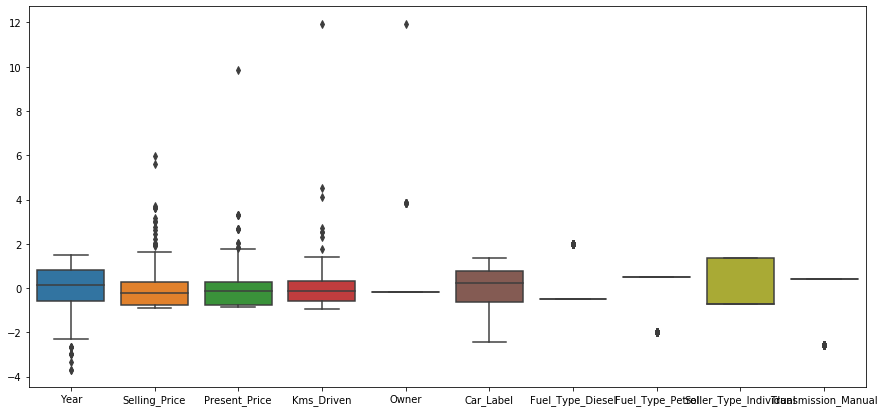

In [60]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data=df_scaled)

In [61]:
df["Kms_Driven"].describe()

count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64

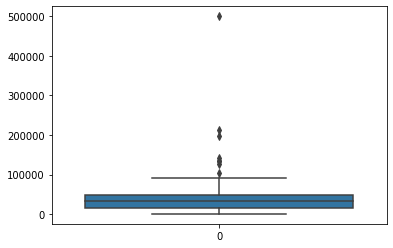

In [62]:
sns.boxplot(data=df["Kms_Driven"])

In [63]:
df[df["Kms_Driven"]>48767].count()

Car_Name         75
Year             75
Selling_Price    75
Present_Price    75
Kms_Driven       75
Fuel_Type        75
Seller_Type      75
Transmission     75
Owner            75
dtype: int64

In [64]:
from sklearn.covariance import EllipticEnvelope
elliptic_env=EllipticEnvelope(contamination=.2)
df["elliptic"]=elliptic_env.fit_predict(df)


ValueError: could not convert string to float: 'ritz'

In [39]:
df[df["elliptic"]==1]

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Label,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,elliptic
0,2014,3.35,5.59,27000,0,90,0,1,0,1,1
1,2013,4.75,9.54,43000,0,93,1,0,0,1,1
2,2017,7.25,9.85,6900,0,68,0,1,0,1,1
3,2011,2.85,4.15,5200,0,96,0,1,0,1,1
4,2014,4.60,6.87,42450,0,92,1,0,0,1,1
5,2018,9.25,9.83,2071,0,95,1,0,0,1,1
6,2015,6.75,8.12,18796,0,68,0,1,0,1,1
7,2015,6.50,8.61,33429,0,91,1,0,0,1,1
8,2016,8.75,8.89,20273,0,68,1,0,0,1,1
9,2015,7.45,8.92,42367,0,68,1,0,0,1,1


In [40]:
ids_outliers=df[df["elliptic"]==-1].index
ids_outliers
df_wo_ols=df.drop(ids_outliers,axis=0)
df_wo_ols
# df[df["elliptic"]==-1]

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Label,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,elliptic
0,2014,3.35,5.59,27000,0,90,0,1,0,1,1
1,2013,4.75,9.54,43000,0,93,1,0,0,1,1
2,2017,7.25,9.85,6900,0,68,0,1,0,1,1
3,2011,2.85,4.15,5200,0,96,0,1,0,1,1
4,2014,4.60,6.87,42450,0,92,1,0,0,1,1
5,2018,9.25,9.83,2071,0,95,1,0,0,1,1
6,2015,6.75,8.12,18796,0,68,0,1,0,1,1
7,2015,6.50,8.61,33429,0,91,1,0,0,1,1
8,2016,8.75,8.89,20273,0,68,1,0,0,1,1
9,2015,7.45,8.92,42367,0,68,1,0,0,1,1


In [41]:
df_wo_ols["Depriciation"]=df_wo_ols["Present_Price"]-df_wo_ols["Selling_Price"]

In [42]:
df_wo_ols.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Label,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,elliptic,Depriciation
0,2014,3.35,5.59,27000,0,90,0,1,0,1,1,2.24
1,2013,4.75,9.54,43000,0,93,1,0,0,1,1,4.79
2,2017,7.25,9.85,6900,0,68,0,1,0,1,1,2.60
3,2011,2.85,4.15,5200,0,96,0,1,0,1,1,1.30
4,2014,4.60,6.87,42450,0,92,1,0,0,1,1,2.27


In [43]:
df_highest_deprc_car=df.groupby("Car_Name")["Depriciation"].mean().nlargest()
df_highest_deprc_car

KeyError: 'Car_Name'

KeyError: 'Car_Name'

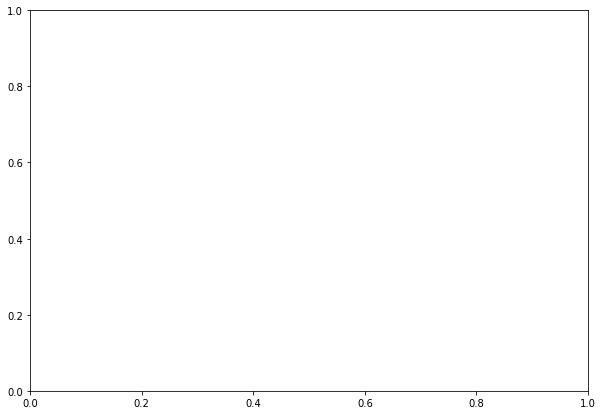

In [44]:
# plot data
fig, ax = plt.subplots(figsize=(10,7))
# use unstack()
df.groupby(["Car_Name","Year"]).mean().nlargest(5,"Depriciation")['Depriciation'].plot(kind="bar")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()/2))


In [ ]:
# plot data
fig, ax = plt.subplots(figsize=(10,7))
# use unstack()
df.groupby(["Fuel_Type"]).mean()['Kms_Driven'].plot(kind="bar")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()/2))


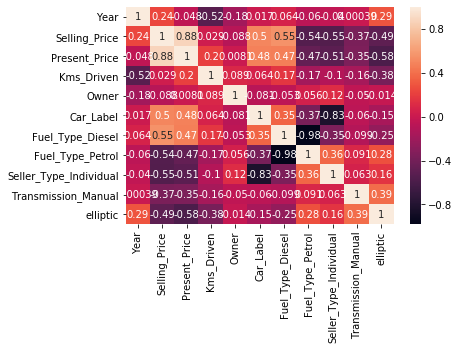

In [45]:
sns.heatmap(df.corr(),annot=True)

In [46]:
#Dropping Present_Price as there is highly correlation
df.drop(["Present_Price"],axis=1)

,Year,Selling_Price,Kms_Driven,Owner,Car_Label,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,elliptic
0,2014,3.35,27000,0,90,0,1,0,1,1
1,2013,4.75,43000,0,93,1,0,0,1,1
2,2017,7.25,6900,0,68,0,1,0,1,1
3,2011,2.85,5200,0,96,0,1,0,1,1
4,2014,4.60,42450,0,92,1,0,0,1,1
5,2018,9.25,2071,0,95,1,0,0,1,1
6,2015,6.75,18796,0,68,0,1,0,1,1
7,2015,6.50,33429,0,91,1,0,0,1,1
8,2016,8.75,20273,0,68,1,0,0,1,1
9,2015,7.45,42367,0,68,1,0,0,1,1


In [47]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Label,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,elliptic
0,2014,3.35,5.59,27000,0,90,0,1,0,1,1
1,2013,4.75,9.54,43000,0,93,1,0,0,1,1
2,2017,7.25,9.85,6900,0,68,0,1,0,1,1
3,2011,2.85,4.15,5200,0,96,0,1,0,1,1
4,2014,4.60,6.87,42450,0,92,1,0,0,1,1


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Car_Label"]=le.fit_transform(df["Car_Name"])

KeyError: 'Car_Name'

In [49]:
df_FuelType_Dummies=pd.get_dummies(df[["Fuel_Type","Seller_Type","Transmission"]],drop_first=True)

KeyError: "None of [Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')] are in the [columns]"

In [50]:
df=df.merge(df_FuelType_Dummies,left_index=True,right_index=True)

In [51]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Label,Fuel_Type_Diesel_x,Fuel_Type_Petrol_x,Seller_Type_Individual_x,Transmission_Manual_x,elliptic,Fuel_Type_Diesel_y,Fuel_Type_Petrol_y,Seller_Type_Individual_y,Transmission_Manual_y
0,2014,3.35,5.59,27000,0,90,0,1,0,1,1,0,1,0,1
1,2013,4.75,9.54,43000,0,93,1,0,0,1,1,1,0,0,1
2,2017,7.25,9.85,6900,0,68,0,1,0,1,1,0,1,0,1
3,2011,2.85,4.15,5200,0,96,0,1,0,1,1,0,1,0,1
4,2014,4.60,6.87,42450,0,92,1,0,0,1,1,1,0,0,1


In [52]:
#Dropping the Categoorial Column
df=df.drop(["Car_Name","Fuel_Type","Seller_Type","Transmission"],axis=1)

KeyError: "['Car_Name' 'Fuel_Type' 'Seller_Type' 'Transmission'] not found in axis"

In [53]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Label,Fuel_Type_Diesel_x,Fuel_Type_Petrol_x,Seller_Type_Individual_x,Transmission_Manual_x,elliptic,Fuel_Type_Diesel_y,Fuel_Type_Petrol_y,Seller_Type_Individual_y,Transmission_Manual_y
0,2014,3.35,5.59,27000,0,90,0,1,0,1,1,0,1,0,1
1,2013,4.75,9.54,43000,0,93,1,0,0,1,1,1,0,0,1
2,2017,7.25,9.85,6900,0,68,0,1,0,1,1,0,1,0,1
3,2011,2.85,4.15,5200,0,96,0,1,0,1,1,0,1,0,1
4,2014,4.60,6.87,42450,0,92,1,0,0,1,1,1,0,0,1


In [54]:
Y=df["Selling_Price"]
X=df.drop("Selling_Price",axis=1)
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64